In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 63.8 MB/s 


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,024 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [3]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 8.55 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-09 10:19:40--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=N3Izs0

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

plt.rc('font', family='Malgun Gothic')
train_df = pd.read_excel('/content/drive/MyDrive/sentiment_analysis.xlsx')
train_df.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,NaN,NaN
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,NaN,NaN
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,NaN,NaN


In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from konlpy.tag import Okt
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [7]:
train_df.shape

(74856, 14)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74856 entries, 0 to 74855
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      74856 non-null  int64 
 1   value   74856 non-null  int64 
 2   연령      74856 non-null  object
 3   성별      74856 non-null  object
 4   상황키워드   74856 non-null  object
 5   신체질환    74856 non-null  object
 6   감정_대분류  74856 non-null  object
 7   감정_소분류  74856 non-null  object
 8   사람문장1   74856 non-null  object
 9   시스템응답1  74856 non-null  object
 10  사람문장2   74856 non-null  object
 11  시스템응답2  74855 non-null  object
 12  사람문장3   49660 non-null  object
 13  시스템응답3  49654 non-null  object
dtypes: int64(2), object(12)
memory usage: 8.0+ MB


In [9]:
train_df.fillna('', inplace = True)

In [10]:
train_df['감정_대분류'].value_counts()

상처    13505
슬픔    12708
분노    12503
기쁨    12449
불안    12383
당황    11308
Name: 감정_대분류, dtype: int64

In [11]:
train_df.drop(['번호', 'value' ,'연령', '성별', '상황키워드', '신체질환', '감정_소분류'],axis=1,inplace = True)

In [12]:
train_df.head()

,감정_대분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,기쁨,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,기쁨,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,
2,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,
3,슬픔,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,슬픔,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,


In [13]:
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 1, '당황' : 1, '슬픔' : 2, '상처' : 2}
train_df['label'] = train_df['감정_대분류'].map(sentimential_list)
train_df.head()

,감정_대분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,label
0,기쁨,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.,0
1,기쁨,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,,0
2,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,,1
3,슬픔,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.,2
4,슬픔,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,,2


In [ ]:
#train_df[(train_df['사람문장3'] == '') | (train_df['시스템응답3'] == '')]['label'].value_counts()

In [ ]:
#train_df['label'].value_counts()

In [14]:
train_df.isnull().sum()

감정_대분류    0
사람문장1     0
시스템응답1    0
사람문장2     0
시스템응답2    0
사람문장3     0
시스템응답3    0
label     0
dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74856 entries, 0 to 74855
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   감정_대분류  74856 non-null  object
 1   사람문장1   74856 non-null  object
 2   시스템응답1  74856 non-null  object
 3   사람문장2   74856 non-null  object
 4   시스템응답2  74856 non-null  object
 5   사람문장3   74856 non-null  object
 6   시스템응답3  74856 non-null  object
 7   label   74856 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 4.6+ MB


In [16]:
train_df['label'].value_counts()

1    36194
2    26213
0    12449
Name: label, dtype: int64

텍스트 전처리 : text를 모든 문장을 합쳐서 처리



In [17]:
train_df['text'] = train_df['사람문장1'] + ' ' + train_df['시스템응답1']  + ' ' + train_df['사람문장2'].map(str) + ' ' + train_df['시스템응답2']  + ' ' +train_df['사람문장3']  + ' ' + train_df['시스템응답3']
train_df['text'] = train_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [18]:
train_df.drop_duplicates(subset = ['text'], inplace = True) #중복 제거

In [19]:
print(sum(map(len, train_df['text'])) / len(train_df['text'])) # 평균 글자 수

156.32599047849592


In [20]:
train_df['text'][0]

'지금 난 기분이 너무 좋아 굉장히 즐거우신 것 같은데요 좋은 일이 있나요 오늘부터 연휴가 시작됐거든 내일 회사 안 간다 그거 정말 기분 좋을 만하네요 무엇을 할 예정인가요 그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야 집에서 노는 것이 최고죠 생각만 해도 행복하겠어요'

LSTM 딥러닝을 이용해서 예측하는 경우 -> 감정대분류를 label로 만든다.

In [ ]:
x_data = train_df['text']
y_data = train_df['감정_대분류']

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, stratify = y_data, random_state = 42)
X_train_data.shape, X_test_data.shape, y_train_data.shape, y_test_data.shape

((55768,), (18590,), (55768,), (18590,))

In [ ]:
#불용어 처리
import pickle
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '것','적', '내', '때']

X_train = []
X_test = []
if not os.path.isfile('/content/drive/MyDrive/train.pkl'):
  for sentence in tqdm(X_train_data):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)
  with open("/content/drive/MyDrive/train.pkl","wb") as f:
    pickle.dump(X_train, f)
  for sentence in tqdm(X_test_data):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_test.append(stopwords_removed_sentence)
  with open("/content/drive/MyDrive/test.pkl","wb") as f:
      pickle.dump(X_test, f)
else:
    with open("/content/drive/MyDrive/train.pkl","rb") as f:
        X_train = pickle.load(f)
    with open("/content/drive/MyDrive/test.pkl", "rb") as f:
        X_test = pickle.load(f)  

In [ ]:
X_train[0]

['정년',
 '퇴직',
 '하',
 '선배',
 '보다',
 '나',
 '어쩌나',
 '걱정',
 '이야',
 '어떤',
 '점',
 '가장',
 '크다',
 '걱정',
 '인가요',
 '나',
 '미리',
 '은퇴',
 '준비',
 '해',
 '두다',
 '못',
 '준비',
 '안',
 '돼다',
 '걱정',
 '시',
 '군',
 '요']

In [ ]:
#텍스트를 벡터화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
tokenizer.word_index['너무']

1

In [ ]:
threshold = 30
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17337
등장 빈도가 29번 이하인 희귀 단어의 수: 13567
단어 집합에서 희귀 단어의 비율: 78.25459998846398
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.952260958547972


In [ ]:
total_cnt - rare_cnt + 1

3771

In [ ]:
print(tokenizer.word_index)

{'을': 1, '있다': 2, '좋다': 3, '친구': 4, '같다': 5, '어떻다': 6, '되다': 7, '보다': 8, '나': 9, '수': 10, '너무': 11, '그렇다': 12, '생각': 13, '않다': 14, '없다': 15, '요': 16, '자다': 17, '많이': 18, '에서': 19, '안': 20, '사람': 21, '마음': 22, '받다': 23, '더': 24, '못': 25, '말': 26, '들다': 27, '에게': 28, '기분': 29, '일': 30, '정말': 31, '싶다': 32, '힘들다': 33, '걱정': 34, '만': 35, '로': 36, '바라다': 37, '게': 38, '일이': 39, '거': 40, '하고': 41, '이야': 42, '상황': 43, '돈': 44, '모르다': 45, '때문': 46, '지금': 47, '그': 48, '많다': 49, '속상하다': 50, '가다': 51, '회사': 52, '고': 53, '건강': 54, '다': 55, '해보다': 56, '나다': 57, '방법': 58, '돼다': 59, '아니다': 60, '분': 61, '해주다': 62, '왜': 63, '되어다': 64, '남편': 65, '해결': 66, '한테': 67, '가족': 68, '대화': 69, '아내': 70, '스럽다': 71, '무슨': 72, '앞': 73, '준비': 74, '해': 75, '다른': 76, '결혼': 77, '응': 78, '고민': 79, '위해': 80, '가요': 81, '요즘': 82, '오늘': 83, '부모님': 84, '인': 85, '아프다': 86, '먹다': 87, '맞다': 88, '열심히': 89, '슬프다': 90, '오다': 91, '직장': 92, '이야기': 93, '시간': 94, '이제': 95, '서': 96, '화가': 97, '느끼다': 98, '집': 99, '크다': 100, '주다': 101, '문제

In [ ]:
print("단어 집합의 크기 : ", len(tokenizer.word_index))

단어 집합의 크기 :  17337


In [ ]:
vocab_size = total_cnt - rare_cnt + 1

In [ ]:
#텍스트 -> 다시 시퀀스화
total_cnt = vocab_size
tokenizer = Tokenizer(total_cnt)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3], X_test[:3])

[[880, 559, 263, 501, 8, 9, 2535, 34, 42, 883, 360, 235, 101, 34, 300, 9, 642, 170, 74, 75, 223, 26, 74, 20, 60, 34, 164, 146, 16], [655, 4, 3, 329, 45, 73, 39, 2, 219, 16, 9, 919, 20, 79, 41, 32, 524, 47, 472, 174, 181, 79, 22, 15, 79, 102, 36, 77, 17, 7, 8, 95, 297, 106, 59, 1219, 322, 79, 1612, 416, 177, 24, 2941, 9, 5, 100, 19, 79, 1, 1831, 8, 12, 93, 174, 405, 70, 58, 4, 5], [92, 19, 39, 2140, 49, 8, 3049, 234, 539, 2, 236, 413, 88, 5, 132, 36, 22, 373, 416, 134, 35, 24, 456, 530, 172, 2335, 53, 1608, 234, 68, 2635, 1134, 85, 18, 2168, 201, 37]] [[591, 69, 2764, 1418, 456, 1818, 1388, 3, 11, 180, 12, 181, 126, 148, 2764, 491, 118, 456, 1818, 1388, 1, 80, 311, 130, 1, 10, 2, 771, 139, 811, 885, 3, 5, 811, 139, 2255, 52, 566, 47, 290, 210, 3], [388, 430, 2702, 1, 991, 61, 33, 47, 1542, 61, 444, 1, 393, 1566, 456, 36, 1592, 2474, 57, 24, 436, 2702, 456, 36, 16, 1807, 9, 67, 2702, 18, 85, 34, 2702, 1378, 791, 205, 118, 17, 118, 43, 19, 10, 2, 38, 4, 2, 95, 2847, 2264, 1933, 145, 306, 

리뷰의 최대 길이 : 151
리뷰의 평균 길이 : 43.67738947668412


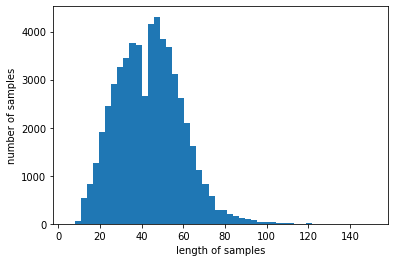

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 70
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 95.65565886502084


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train_data)
y_train = encoder.transform(y_train_data)
y_train = to_categorical(y_train)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_test_data)
y_test = encoder.transform(y_test_data)
y_test = to_categorical(y_test)

In [ ]:
y_train, y_test

(array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]], dtype=float32))

In [ ]:
X_train.shape

(56142, 70)

In [ ]:
total_cnt

3771

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 64
hidden_units = 64
num_classes = 6

model = Sequential()
model.add(Embedding(total_cnt, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))
chkpoint_filepath = "/content/drive/MyDrive/sentiment_analysis.h5"

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 3)
mc = ModelCheckpoint(filepath = chkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.25, verbose = 1)

Epoch 1/50
658/658 [==============================] - ETA: 0s - loss: 1.7910 - accuracy: 0.1782
Epoch 1: val_accuracy improved from -inf to 0.17904, saving model to /content/drive/MyDrive/sentiment_analysis.h5
658/658 [==============================] - 53s 72ms/step - loss: 1.7910 - accuracy: 0.1782 - val_loss: 1.7912 - val_accuracy: 0.1790
Epoch 2/50
658/658 [==============================] - ETA: 0s - loss: 1.7796 - accuracy: 0.2046
Epoch 2: val_accuracy did not improve from 0.17904
658/658 [==============================] - 46s 71ms/step - loss: 1.7796 - accuracy: 0.2046 - val_loss: 1.8023 - val_accuracy: 0.1666
Epoch 3/50
658/658 [==============================] - ETA: 0s - loss: 1.7307 - accuracy: 0.2572
Epoch 3: val_accuracy did not improve from 0.17904
658/658 [==============================] - 47s 71ms/step - loss: 1.7307 - accuracy: 0.2572 - val_loss: 1.8430 - val_accuracy: 0.1651
Epoch 4/50
658/658 [==============================] - ETA: 0s - loss: 1.6660 - accuracy: 0.3035
E

In [ ]:
fig, loss_ax = plt.subplots(figsize=(8, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

2. 여기서부터는 Logistic Regression을 활용하여 감정 예측 => TfidfVectorize로 벡터화
감정 분류 방법
  
 1) 행복 기쁨 / 분노 / 불안 당황 / 슬픔 상처
 2) 행복 기쁨 / 분노 불안 당황 / 슬픔 상처

In [21]:
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 1, '당황' : 1, '슬픔' : 2, '상처' : 2}
train_df['label'] = train_df['감정_대분류'].map(sentimential_list)
train_df.head()

,감정_대분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,label,text
0,기쁨,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.,0,지금 난 기분이 너무 좋아 굉장히 즐거우신 것 같은데요 좋은 일이 있나요 오늘부터 ...
1,기쁨,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,,0,나도 조카가 생겨 너무 기뻐 정말 좋은 소식이네요 축하할 특별한 계획이 있을까요 응...
2,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,,1,거래처와의 다음 계약이 무산될까봐 불안해 많이 걱정되시겠어요 계약이 무산될 것 같다...
3,슬픔,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.,2,당뇨로 고생 중인데 아내가 이혼하자더군 아내가 날 버리면 병은 더 악화될 텐데 세상...
4,슬픔,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,,2,노년에 재정적으로 이루어 놓은게 없어서 걱정이야 나이들어 재정적으로 어려워서 걱정되...


In [22]:
x_data =  train_df['text'].apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", x)).values
y_data = train_df['label']

In [23]:
encoder = LabelEncoder()
encoder.fit(y_data)
y_data_encoded = encoder.transform(y_data)
y_data = to_categorical(y_data_encoded) 

In [24]:
y_data.shape

(74358, 3)

In [25]:
x_data.shape

(74358,)

In [26]:
from konlpy.tag import Okt
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [27]:
x_train[:3]

array(['직장에서 동료의 성과를 가로챈 것 같아서 죄책감에 요즘 잠이 안 와 동료와의 일 때문에 잠이 안 오시는군요 직장에서 어떤 일이 있으셨나요 동료가 아이디어를 내서 기획한 일인데 내가 한 것처럼 상사한테 보고했거든 동료의 아이디어였군요 그 이후에 동료는 어떤 반응을 보였나요 자기는 괜찮다고 하는데 표정이 굉장히 어두워 보였어 나도 그 친구 얼굴을 쳐다보기가 힘들어 동료는 괜찮다고 말을 하였군요',
       '나도 돈이 많아서 비싼과외 받았으면 성적이 올랐을거야 근데 돈이 없어 과외를 받아서 성적을 올리고 싶군요 돈이 부족해서 속상하시겠어요 돈을 어떻게든 구해서 과외를 받아볼까 고민중이야 과외비를 구하려고 하는군요 그거말고 다른방법은 어떤것들이 있을까요 과외비를 마련하는건 무리고 공부 잘하는 친구랑 같이 공부하는게 좋은 방법인 것 같아 공부 잘하는 친구와 공부해서 성적이 올랐으면 좋겠어요',
       '나이가 먹으니 조심스러워져 안전이 제일이죠 몸도 마음도 너무 약해졌어 힘내세요 제가 응원할게요  '],
      dtype=object)

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [29]:
tokenizer.word_index['너무']

1

In [30]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 178552
등장 빈도가 2번 이하인 희귀 단어의 수: 126609
단어 집합에서 희귀 단어의 비율: 70.90875487253014
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.420796009819453


In [31]:
vocab_size = tokenizer.word_index
len(vocab_size)

178552

In [32]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 51944


In [33]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(x_train)
x_train_okt = tokenizer.texts_to_sequences(x_train)
x_test_okt = tokenizer.texts_to_sequences(x_test)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


리뷰의 최대 길이 : 119
리뷰의 평균 길이 : 37.10999226708805


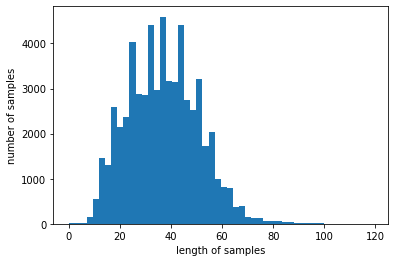

In [34]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_train_okt))
print('리뷰의 평균 길이 :',sum(map(len, x_train_okt))/len(x_train_okt))
plt.hist([len(review) for review in x_train_okt], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [35]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 60
below_threshold_len(max_len, x_train_okt)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 95.4056416635847


In [ ]:
x_train_okt[:2]

[[253,
  3490,
  2305,
  25397,
  3,
  115,
  15645,
  48,
  1891,
  11,
  1330,
  11484,
  101,
  23,
  1891,
  11,
  28812,
  253,
  17,
  19,
  200,
  811,
  3043,
  942,
  19211,
  2141,
  7,
  46,
  855,
  2796,
  3490,
  27,
  3098,
  9498,
  17,
  4231,
  19212,
  3523,
  2896,
  111,
  4948,
  991,
  28813,
  8616,
  65,
  27,
  133,
  1634,
  112,
  9498,
  2896,
  71,
  22911],
 [65,
  92,
  335,
  4644,
  191,
  349,
  92,
  53,
  4645,
  499,
  781,
  8894,
  3876,
  92,
  1566,
  108,
  76,
  2205,
  3798,
  4645,
  7673,
  4583,
  28814,
  14743,
  1082,
  25398,
  13,
  28814,
  40480,
  697,
  849,
  387,
  74,
  15646,
  9,
  1360,
  3,
  8,
  697,
  849,
  173,
  2306,
  191,
  14744,
  16]]

In [36]:
x_train_okt = pad_sequences(x_train_okt, maxlen=max_len)
x_test_okt = pad_sequences(x_test_okt, maxlen=max_len)

In [42]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 60
hidden_units = 128
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(num_classes, activation='softmax'))
chkpoint_filepath = "/content/drive/MyDrive/best_sentimental_model.h5"

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
mc = ModelCheckpoint(filepath = chkpoint_filepath,monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
history = model.fit(x_train_okt, y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2, verbose = 1)

Epoch 1/50
744/744 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.6369
Epoch 1: val_loss improved from inf to 0.54789, saving model to /content/drive/MyDrive/best_sentimental_model.h5
744/744 [==============================] - 271s 254ms/step - loss: 0.7126 - accuracy: 0.6369 - val_loss: 0.5479 - val_accuracy: 0.7733
Epoch 2/50
744/744 [==============================] - ETA: 0s - loss: 0.4048 - accuracy: 0.8360
Epoch 2: val_loss improved from 0.54789 to 0.50957, saving model to /content/drive/MyDrive/best_sentimental_model.h5
744/744 [==============================] - 185s 249ms/step - loss: 0.4048 - accuracy: 0.8360 - val_loss: 0.5096 - val_accuracy: 0.7919
Epoch 3/50
744/744 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.9051
Epoch 3: val_loss did not improve from 0.50957
744/744 [==============================] - 184s 247ms/step - loss: 0.2559 - accuracy: 0.9051 - val_loss: 0.5865 - val_accuracy: 0.7720
Epoch 4/50
744/744 [==========

In [ ]:
#x_test, y_test 해보기

1. 각 문장마다 어떤 정확도를 보이는 지 확인해보기

In [ ]:
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [ ]:
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer

def transform_data(x_train, x_test):
  if not os.path.isfile('okt_train.npz'):
    tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
    tfidf.fit(x_train)
    x_train_okt = tfidf.transform(x_train)
    x_test_okt = tfidf.transform(x_test)
    save_npz('okt_train.npz', x_train_okt)
    save_npz('okt_test.npz', x_test_okt)
  else:
    x_train_okt = load_npz('okt_train.npz')
    x_test_okt = load_npz('okt_test.npz')

    return x_train_okt, x_test_okt

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import time

def light_gbm_train(x_train_okt, x_test_okt, y_train, y_test):
  start = time.time()
  lgbm_clf = LGBMClassifier(n_estimators = 400, n_jobs = -1, verbose = 1)
  lgbm_clf.fit(x_train_okt, y_train)
  preds = lgbm_clf.predict(x_test_okt)
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')
  print('LGBM Classifier accuracy score : ', accuracy_score(y_test, preds))
  print("LGBM Classifier\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('LGBM Classifier 분류 걸린 시간 : ', time.time() - start)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

def LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test):
  start = time.time()
  clf = LogisticRegression(max_iter = 1000, random_state = 0)
  clf.fit(x_train_okt, y_train)
  preds = clf.predict(x_test_okt)
  print('LogisticRegression accuracy score : ', accuracy_score(y_test, preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("Logistic Regression general set\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1)) 
  print('Logistic Regression 걸린 시간 : ', time.time() - start)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import time

def LogisticRegression_liblinear(x_train_okt, x_test_okt, y_train, y_test):
  start = time.time()
  clf = LogisticRegression(max_iter = 1000, random_state = 0, solver = "liblinear", C = 3)
  clf.fit(x_train_okt, y_train)
  preds = clf.predict(x_test_okt)
  print('LogisticRegression_liblinear accuracy score : ', accuracy_score(y_test,  preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("Logistic Regression liblinear")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('Logistic Regression liblinear 걸린 시간 : ', time.time() - start)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import time

def Logistic_with_CountVectorizer(x_data, y_data):
  start = time.time()
  count_vec = CountVectorizer(tokenizer = okt.morphs)
  x_train_data = count_vec.fit_transform(x_data)
  x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_data, test_size = 0.25, random_state = 156)
  clf = LogisticRegression(max_iter = 1000, solver = 'liblinear',)
  clf.fit(x_train, y_train)
  preds = clf.predict(x_test)
  print('Logistic with CountVectorizer accuracy score : ', accuracy_score(y_test, preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("Logistic with CountVectorizer\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('Logistic with CountVectorizer 걸린 시간 : ', time.time() - start)

In [ ]:
load_npz('okt_train.npz')

In [ ]:
from konlpy.tag import Okt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from scipy.sparse import save_npz, load_npz


'''train_df['text'] = train_df['사람문장1'] + train_df['시스템응답1'] + train_df['사람문장2'].map(str) + train_df['시스템응답2'] + train_df['사람문장3'] + train_df['시스템응답3']
x_data =  train_df['text'].apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", x)).values
y_data = train_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.25, random_state = 42)

okt = Okt()

if not os.path.isfile('second_train.npz'):
  tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
  tfidf.fit(x_train)
  x_train_okt = tfidf.transform(x_train)
  x_test_okt = tfidf.transform(x_test)
  save_npz('second_train.npz', x_train_okt)
  save_npz('second_test.npz', x_test_okt)
else:
  x_train_okt = load_npz('second_train.npz')
  x_test_okt = load_npz('second_test.npz')'''

print('===================전체 정확도=================')
light_gbm_train(X_train, X_test, y_train, y_test)
LogisticRegression_train(X_train, X_test, y_train, y_test)
LogisticRegression_liblinear(X_train, X_test, y_train, y_test)
#Logistic_with_CountVectorizer(x_data, y_data)

In [ ]:
text = ["나 진짜 너 오늘 죽여버림 ㅋ", "그 영화 진짜 너무 재밌었던 것 같아서 행복해",
        "요즘 인생 현타 겁나 옴 ㅋ", "나 오늘 시험 100점 맞을 겨", "짜증나", "나는 뭘 해도 안될거야", "너 때문에 내가 지금 너무 빡친다"]
clf = LogisticRegression(max_iter = 1000, random_state = 0, solver = "liblinear", C = 3)
clf.fit(x_train_okt, y_train)
score = clf.predict(tfidf.transform(text))
print(score)
print(clf.predict_proba(tfidf.transform(text)))

In [ ]:
test_df = pd.read_excel('/content/test_data.xlsx')
test_df.head()

In [ ]:
test_df.info()

In [ ]:
test_df.fillna('', inplace = True)

In [ ]:
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 2, '당황' : 2, '슬픔' : 2, '상처' : 2}
test_df['label'] = test_df['감정_대분류'].map(sentimential_list)

NameError: ignored

In [ ]:
test_df['text'] = test_df['사람문장1'] + test_df['시스템응답1'] + test_df['사람문장2'].map(str) + test_df['시스템응답2'] + test_df['사람문장3'] + test_df['시스템응답3']
test_df.head()

NameError: ignored

In [ ]:
start = time.time()
clf = LogisticRegression(max_iter = 1000, random_state = 0, solver = "liblinear", C = 3)
clf.fit(x_train_okt, y_train)
score = clf.predict(tfidf.transform(test_df['text']))
test_df['prediction'] = score
test_df['result'] = test_df['label'] - test_df['prediction']
print('전체 정확도는 : ', end = ' ')
print(len(test_df[test_df['result'] == 0]) / len(test_df['result']))
print('걸린 시간 : ', time.time() - start)
print("========================")

In [ ]:
start = time.time()
lgbm_clf = LGBMClassifier(n_estimators = 400, n_jobs = -1, verbose = 1)
lgbm_clf.fit(x_train_okt, y_train)
score = lgbm_clf.predict(tfidf.transform(test_df['text']))
test_df['LGB_prediction'] = score
test_df['LGB_result'] = test_df['label'] - test_df['LGB_prediction']
print('LGBM 전체 정확도는 : ', end = ' ')
print(len(test_df[test_df['LGB_result'] == 0]) / len(test_df['result']))
print('걸린 시간 : ', time.time() - start)

In [ ]:
print(len(test_df[test_df['result'] == 0]) / len(test_df['result']))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df = 5).fit(x_data)

In [ ]:
import re
#train_df['text'] = train_df['사람문장1'] + train_df['시스템응답1'] + train_df['사람문장2'].map(str) + train_df['시스템응답2'] + train_df['사람문장3'] + train_df['시스템응답3']
x_data = train_df['text']
y_data = train_df['label']

x_data = x_data.apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", x)).values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.25, random_state = 42)

from konlpy.tag import Okt

okt = Okt()
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
tfidf.fit(x_train)
x_train_okt = tfidf.transform(x_train)
x_test_okt = tfidf.transform(x_test)
print('=======text를 다 합치면=======')
lgbm_clf = LGBMClassifier(n_estimators = 400, n_jobs = -1, verbose = 1)
lgbm_clf.fit(x_train_okt, y_train)
preds = lgbm_clf.predict(x_test_okt)
confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average = 'weighted')
recall = recall_score(y_test, preds, average = 'weighted')
f1 = f1_score(y_test, preds, average = 'weighted')

print("LGBM Classifier\n")
print(confusion)
print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'.format(accuracy,precision,recall,f1))#LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test)
#LogisticRegression_liblinear(x_train_okt, x_test_okt, y_train, y_test)
#Logistic_with_CountVectorizer(x_data, y_data)

=======text를 다 합치면=======
LGBM Classifier

[[ 2647    34   431]
 [   38  1794  1294]
 [  176   363 11937]]
정확도: 0.8752
정밀도: 0.8731
재현율: 0.8752
f1: 0.8690


In [ ]:
print('=======text를 다 합치면=======')
lgbm_clf = LGBMClassifier(n_estimators = 400, n_jobs = -1, verbose = 1)
lgbm_clf.fit(x_train_okt, y_train)
preds = lgbm_clf.predict(x_test_okt)
confusion = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average = 'weighted')
recall = recall_score(y_test, preds, average = 'weighted')
f1 = f1_score(y_test, preds, average = 'weighted')

print("LGBM Classifier\n")
print(confusion)
print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'.format(accuracy,precision,recall,f1))#LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test)

=======text를 다 합치면=======
LGBM Classifier

[[ 2647    34   431]
 [   38  1794  1294]
 [  176   363 11937]]
정확도: 0.8752
정밀도: 0.8731
재현율: 0.8752
f1: 0.8690


In [ ]:
text = ["나 진짜 너 오늘 죽여버림 ㅋ", "그 영화 진짜 너무 재밌었던 것 같아서 행복해",
        "요즘 인생 현타 겁나 옴 ㅋ", "나 오늘 시험 100점 맞을 겨"]
score = lgbm_clf.predict(tfidf.transform(text))
print(score)
print(lgbm_clf.predict_proba(tfidf.transform(text)))

In [ ]:
if not os.path.isfile('okt_train.npz'):
  tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
  tfidf.fit(x_train)
  x_train_okt = tfidf.transform(x_train)
  x_test_okt = tfidf.transform(x_test)
  save_npz('okt_train.npz', x_train_okt)
  save_npz('okt_test.npz', x_test_okt)
else:
  x_train_okt = load_npz('okt_train.npz')
  x_test_okt = load_npz('okt_test.npz')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(max_iter = 1000, random_state = 0)
params = {'C' : [0.01, 0.1, 0.5,  1, 5, 10]}
grid_cv = GridSearchCV(clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv.fit(x_train_okt, y_train)

print(grid_cv.best_params_, grid_cv.best_score_)

In [ ]:
count_vec.vocabulary_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.utils.fixes import loguniform

sgd = SGDClassifier(loss = 'log', random_state = 42)
param_dist = {'alpha' : loguniform(0.0001, 100.0)}

rsv_okt = RandomizedSearchCV(estimator = sgd, param_distributions = param_dist,
                             n_iter = 50, random_state = 42, verbose = 1)
rsv_okt.fit(x_train_okt, y_train)

In [ ]:
print(rsv_okt.best_score_)
print(rsv_okt.best_params_)